## plot distribution of dataset

In [115]:
import os, dill
import json
from scipy import stats
import matplotlib.pyplot as plt
import sys
import glob
import numpy as np
import torch
import torch.nn as nn
import math

sys.path.append('..')

import ptm_recommender.graph_models.graph_util as util
from ptm_recommender.graph_models.gcnn.gin_utils import graph_to_s2vgraphs

torch.set_num_threads(2)
torch.cuda.is_available = lambda : False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


DILL_PATH = '../ptm_model_bench/base_model_dataset/'
MODEL_PATH = '../results/gcnn_ptm_model_bench/'
PERFORMANCE_PATH = '../ptm_model_bench/performance/merged_models/'
OUTPUT_NAME = 'result'

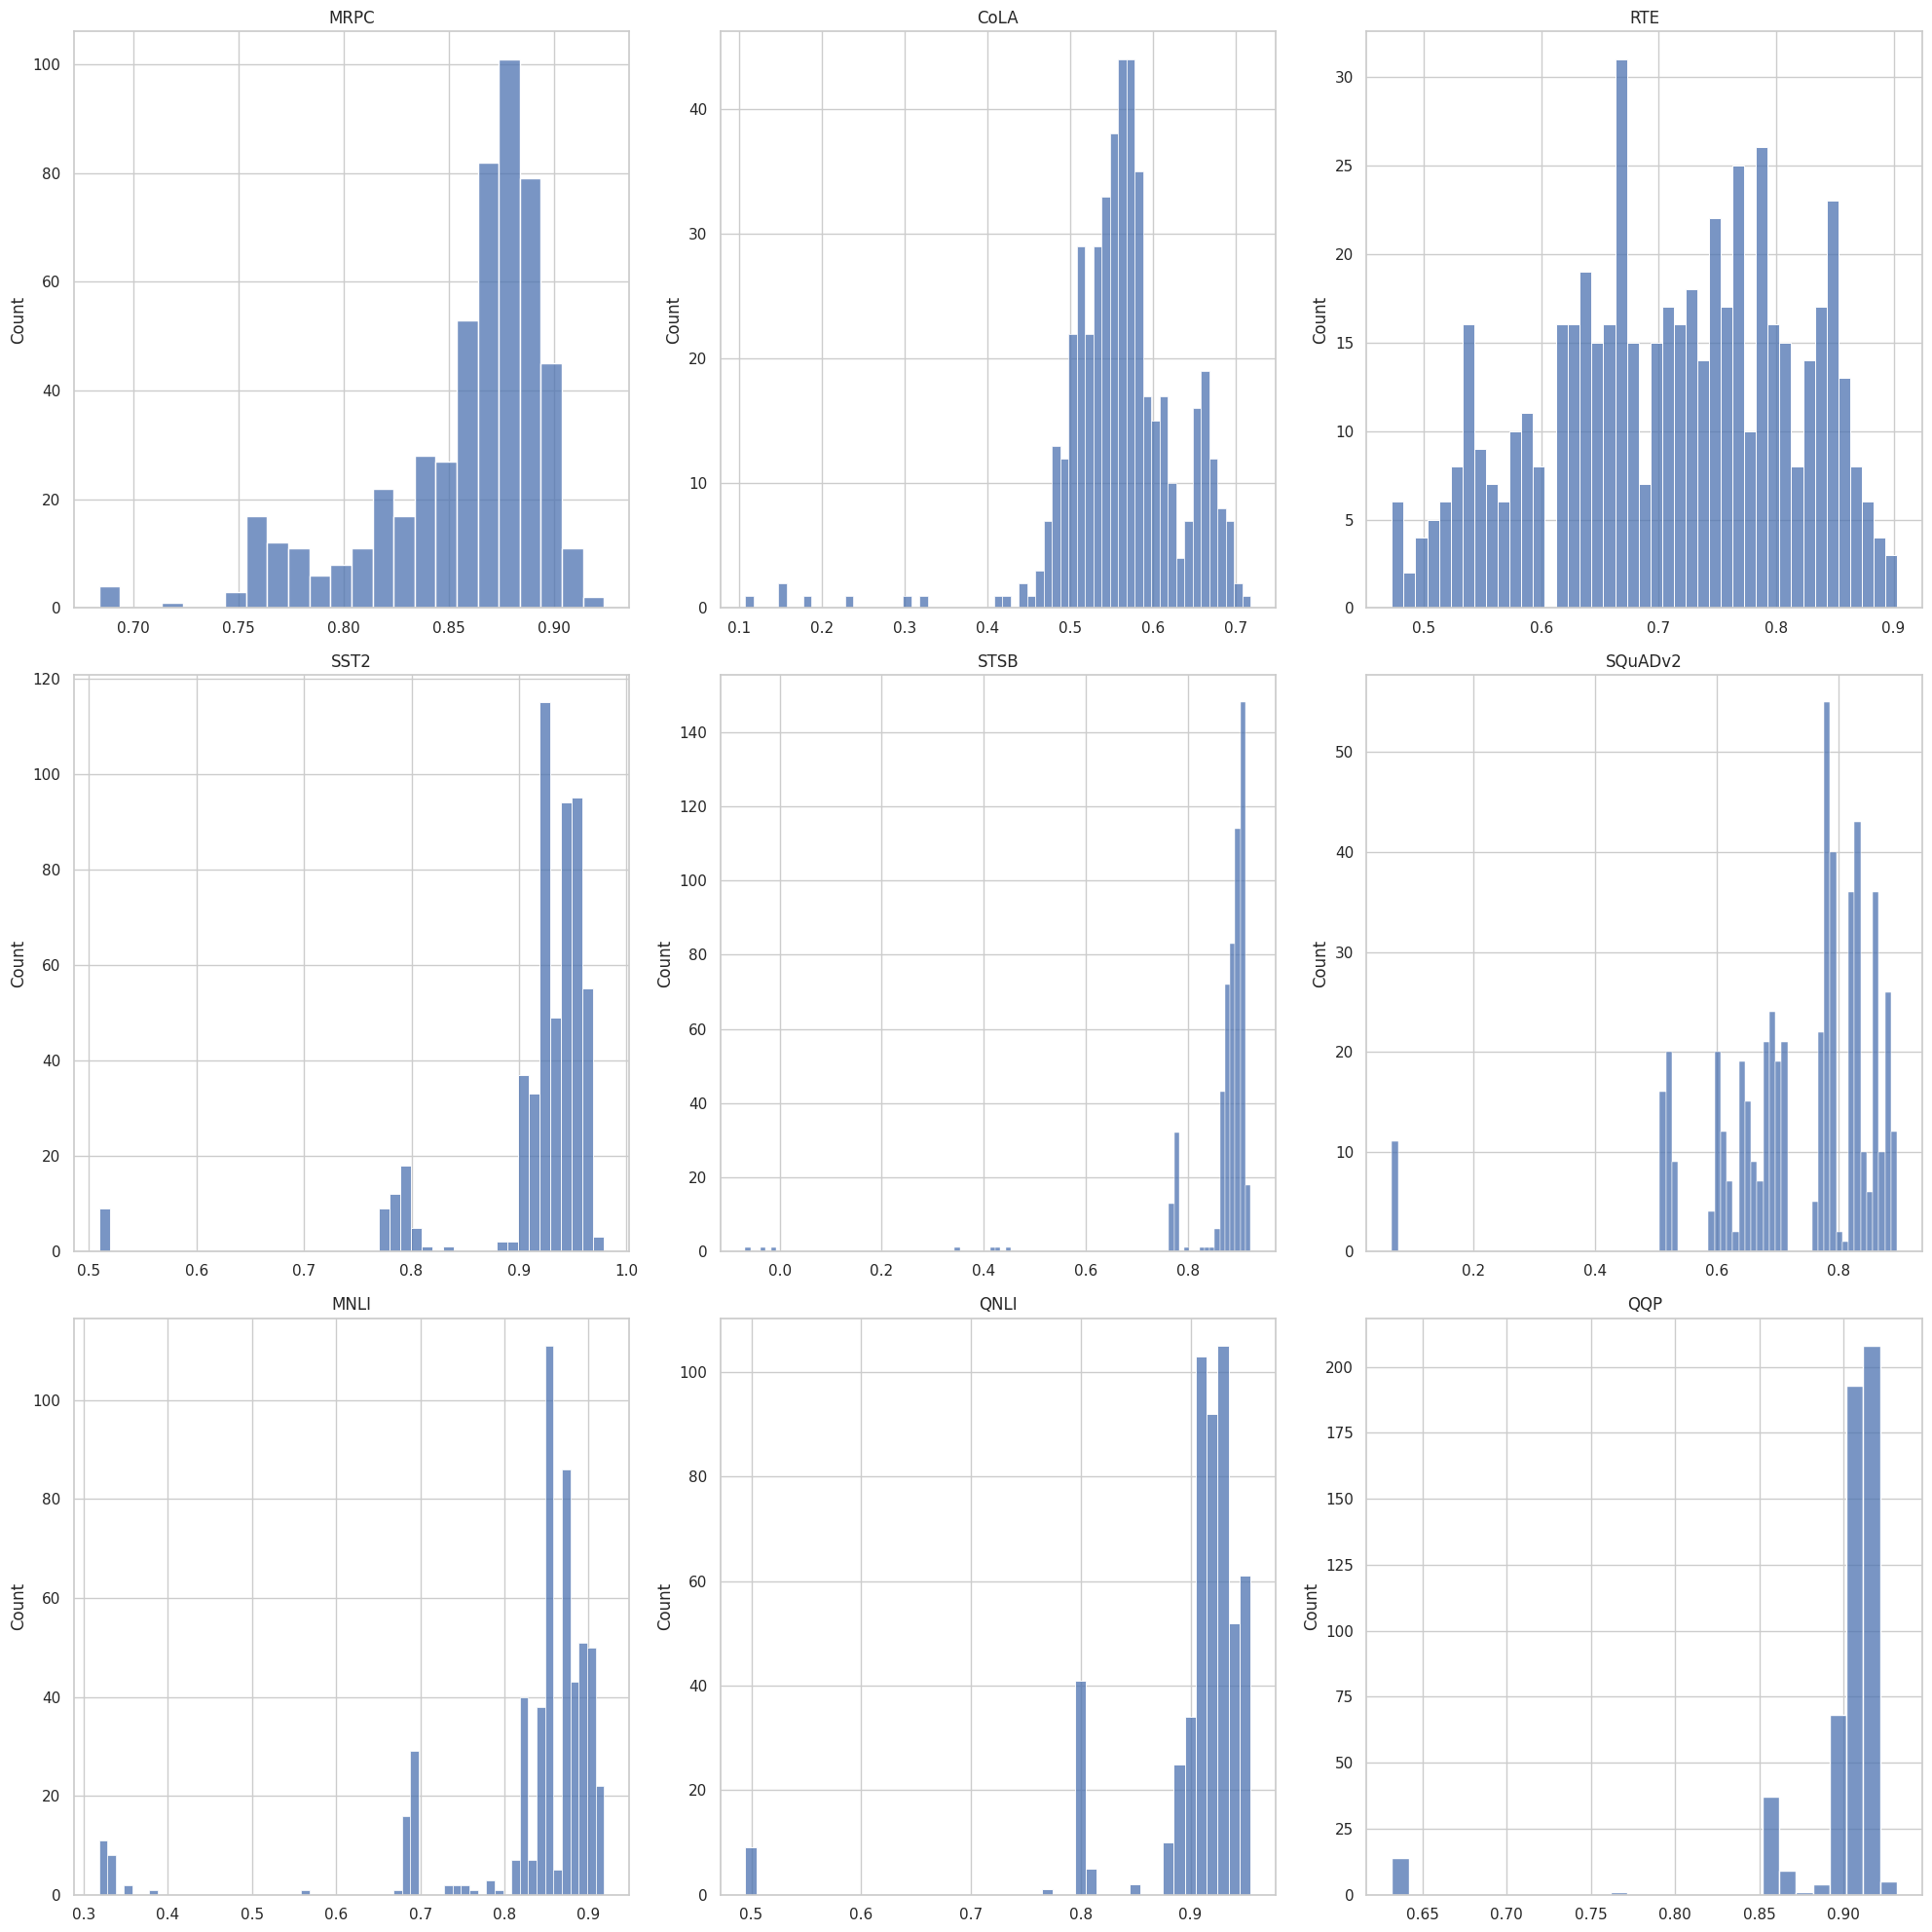

In [199]:
# 각 dataset마다 distribution plot+
import json
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

task_to_metric = {
            "mrpc" : "eval_accuracy",  "cola" : "eval_matthews_correlation", #"cola" : "eval_accuracy",
            "rte" :'eval_accuracy', "sst2" :'eval_accuracy', "stsb" :'eval_pearson',
             "squad_v2": "f1", "mnli": "eval_accuracy", 
            "qnli": "eval_accuracy", "qqp": "eval_accuracy"
}
tasks =task_to_metric.keys()


def load_accuracy(task):
    with open(f'../ptm_model_bench/performance/merged_models/{task}_performance_score.json') as f:
        perf = json.load(f)
    perf_list= [i[task_to_metric[task]]  for k, i in perf[task].items() ]
    if task == 'squad_v2':
        perf_list = [x/100 for x in perf_list]
        
    if task == 'cola':
        perf_list = [x for x in perf_list if x>0.1]
    
    return perf_list


# 동시에 plot됨, 만약 하나씩 보고 싶은면 for loop중 1개만 실행하면 됨
# Set the style for the plots
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for task, ax in zip(tasks, axes.flat): 
    y=load_accuracy(task)
#         print(f'distribution of {task}..', "length of perf : ", len(y))
    sns.histplot(y, kde = False, ax=ax, binwidth=0.01, label=task).set(
        title="{}".format(task_title[task]))
plt.tight_layout()
# plt.show()
plt.savefig('dataset_distribution.png', dpi=200)


In [183]:
task_to_metric = {
            "mrpc" : "eval_accuracy",  "cola" : "matthews_correlation", 
            "rte" :'accuracy', "sst2" :'accuracy', "stsb" :'pearson',
            "wnli" :'accuracy', "squad_v2": "f1", "mnli": "accuracy", 
            "qnli": "accuracy", "qqp": "accuracy"
}

base_model_list = [
    "albert-base-v2", 
    "albert-large-v2",
    "bert-base-uncased", 
    "bert-large-uncased", 
    "distilbert-base-uncased",
    "distilroberta-base", 
    "electra-base-discriminator",
    "electra-large-discriminator",
    "roberta-base", 
    "roberta-large",
    "xlm-roberta-base", 
    "xlm-roberta-large"
]


colors = [
    'tab:blue',
    'tab:blue',
    'tab:orange',
    'tab:orange',
    'tab:purple',
    'tab:purple',
    'tab:pink',
    'tab:pink',
    'tab:olive',
    'tab:olive',
    'tab:cyan',
    'tab:cyan'
]
base_model_to_color_hash={
    "albert-base-v2": sns.light_palette('blue', n_colors=5, reverse=False)[2], #'blue',
    "albert-large-v2":sns.light_palette('blue', n_colors=5, reverse=True)[2],
    "bert-base-uncased": 'orange', 
    "bert-large-uncased": sns.light_palette('orange', n_colors=10, reverse=True)[2],
    "distilbert-base-uncased":'purple',
    "distilroberta-base": sns.light_palette('purple', n_colors=10, reverse=True)[2],
    "electra-base-discriminator":'pink', 
    "electra-large-discriminator":sns.light_palette('pink', n_colors=10, reverse=True)[2],
    "roberta-base": 'olive', 
    "roberta-large":sns.light_palette('olive', n_colors=10, reverse=True)[2],
    "xlm-roberta-base": 'cyan', 
    "xlm-roberta-large":sns.light_palette('cyan', n_colors=10, reverse=True)[2],
}

base_model_to_color_hash={
    "albert-base-v2": sns.light_palette('blue', n_colors=10, reverse=True)[8], #'blue',
    "albert-large-v2":sns.light_palette('blue', n_colors=10, reverse=True)[4],
    "bert-base-uncased": sns.light_palette('orange', n_colors=10, reverse=True)[8], 
    "bert-large-uncased": sns.light_palette('orange', n_colors=10, reverse=True)[4],
    "distilbert-base-uncased":sns.light_palette('purple', n_colors=10, reverse=True)[8],
    "distilroberta-base": sns.light_palette('purple', n_colors=10, reverse=True)[4],
    "electra-base-discriminator":sns.light_palette('pink', n_colors=10, reverse=True)[8],
    "electra-large-discriminator":sns.light_palette('pink', n_colors=10, reverse=True)[4],
    "roberta-base": sns.light_palette('olive', n_colors=10, reverse=True)[8],
    "roberta-large":sns.light_palette('olive', n_colors=10, reverse=True)[4],
    "xlm-roberta-base": sns.light_palette('cyan', n_colors=10, reverse=True)[8],
    "xlm-roberta-large":sns.light_palette('cyan', n_colors=10, reverse=True)[4],
}

base_model_to_color={
    "albert-base-v2": 'blue',
    "albert-large-v2":'blue', 
    "bert-base-uncased": 'orange',
    "bert-large-uncased": 'orange',
    "distilbert-base-uncased":'purple', 
    "distilroberta-base": 'purple', 
    "electra-base-discriminator": 'pink', 
    "electra-large-discriminator":'pink', 
    "roberta-base": 'olive', 
    "roberta-large": 'olive',
    "xlm-roberta-base": 'cyan', 
    "xlm-roberta-large": 'cyan'
}
base_model_to_hatch={
    "albert-base-v2": None,
    "albert-large-v2":'//', 
    "bert-base-uncased": None,
    "bert-large-uncased": '//',
    "distilbert-base-uncased":None, 
    "distilroberta-base": '//', 
    "electra-base-discriminator": None, 
    "electra-large-discriminator":'//', 
    "roberta-base": None, 
    "roberta-large": '//',
    "xlm-roberta-base": None, 
    "xlm-roberta-large": '//'
}

markers_1 = [
    '.',
    'x',
    '.',
    'x',
    '.',
    'x',
    '.',
    'x',
    '.',
    'x',
    '.',
    'x'
]

markers_2 = [
    'o',
    '^',
    'd',
    '+',
    'x',
    'o',
    '^',
    'd',
    '+',
    'x'
]

# Task for title
task_title = {
    "cola":'CoLA', 
    "mrpc":'MRPC',
    "rte" :'RTE', 
    "sst2" :'SST2', 
    "stsb" :'STSB',
    "wnli" :'WNLI', 
    "squad_v2": 'SQuADv2',
    "mnli": 'MNLI', 
    "qnli": 'QNLI', 
    "qqp": 'QQP'
}

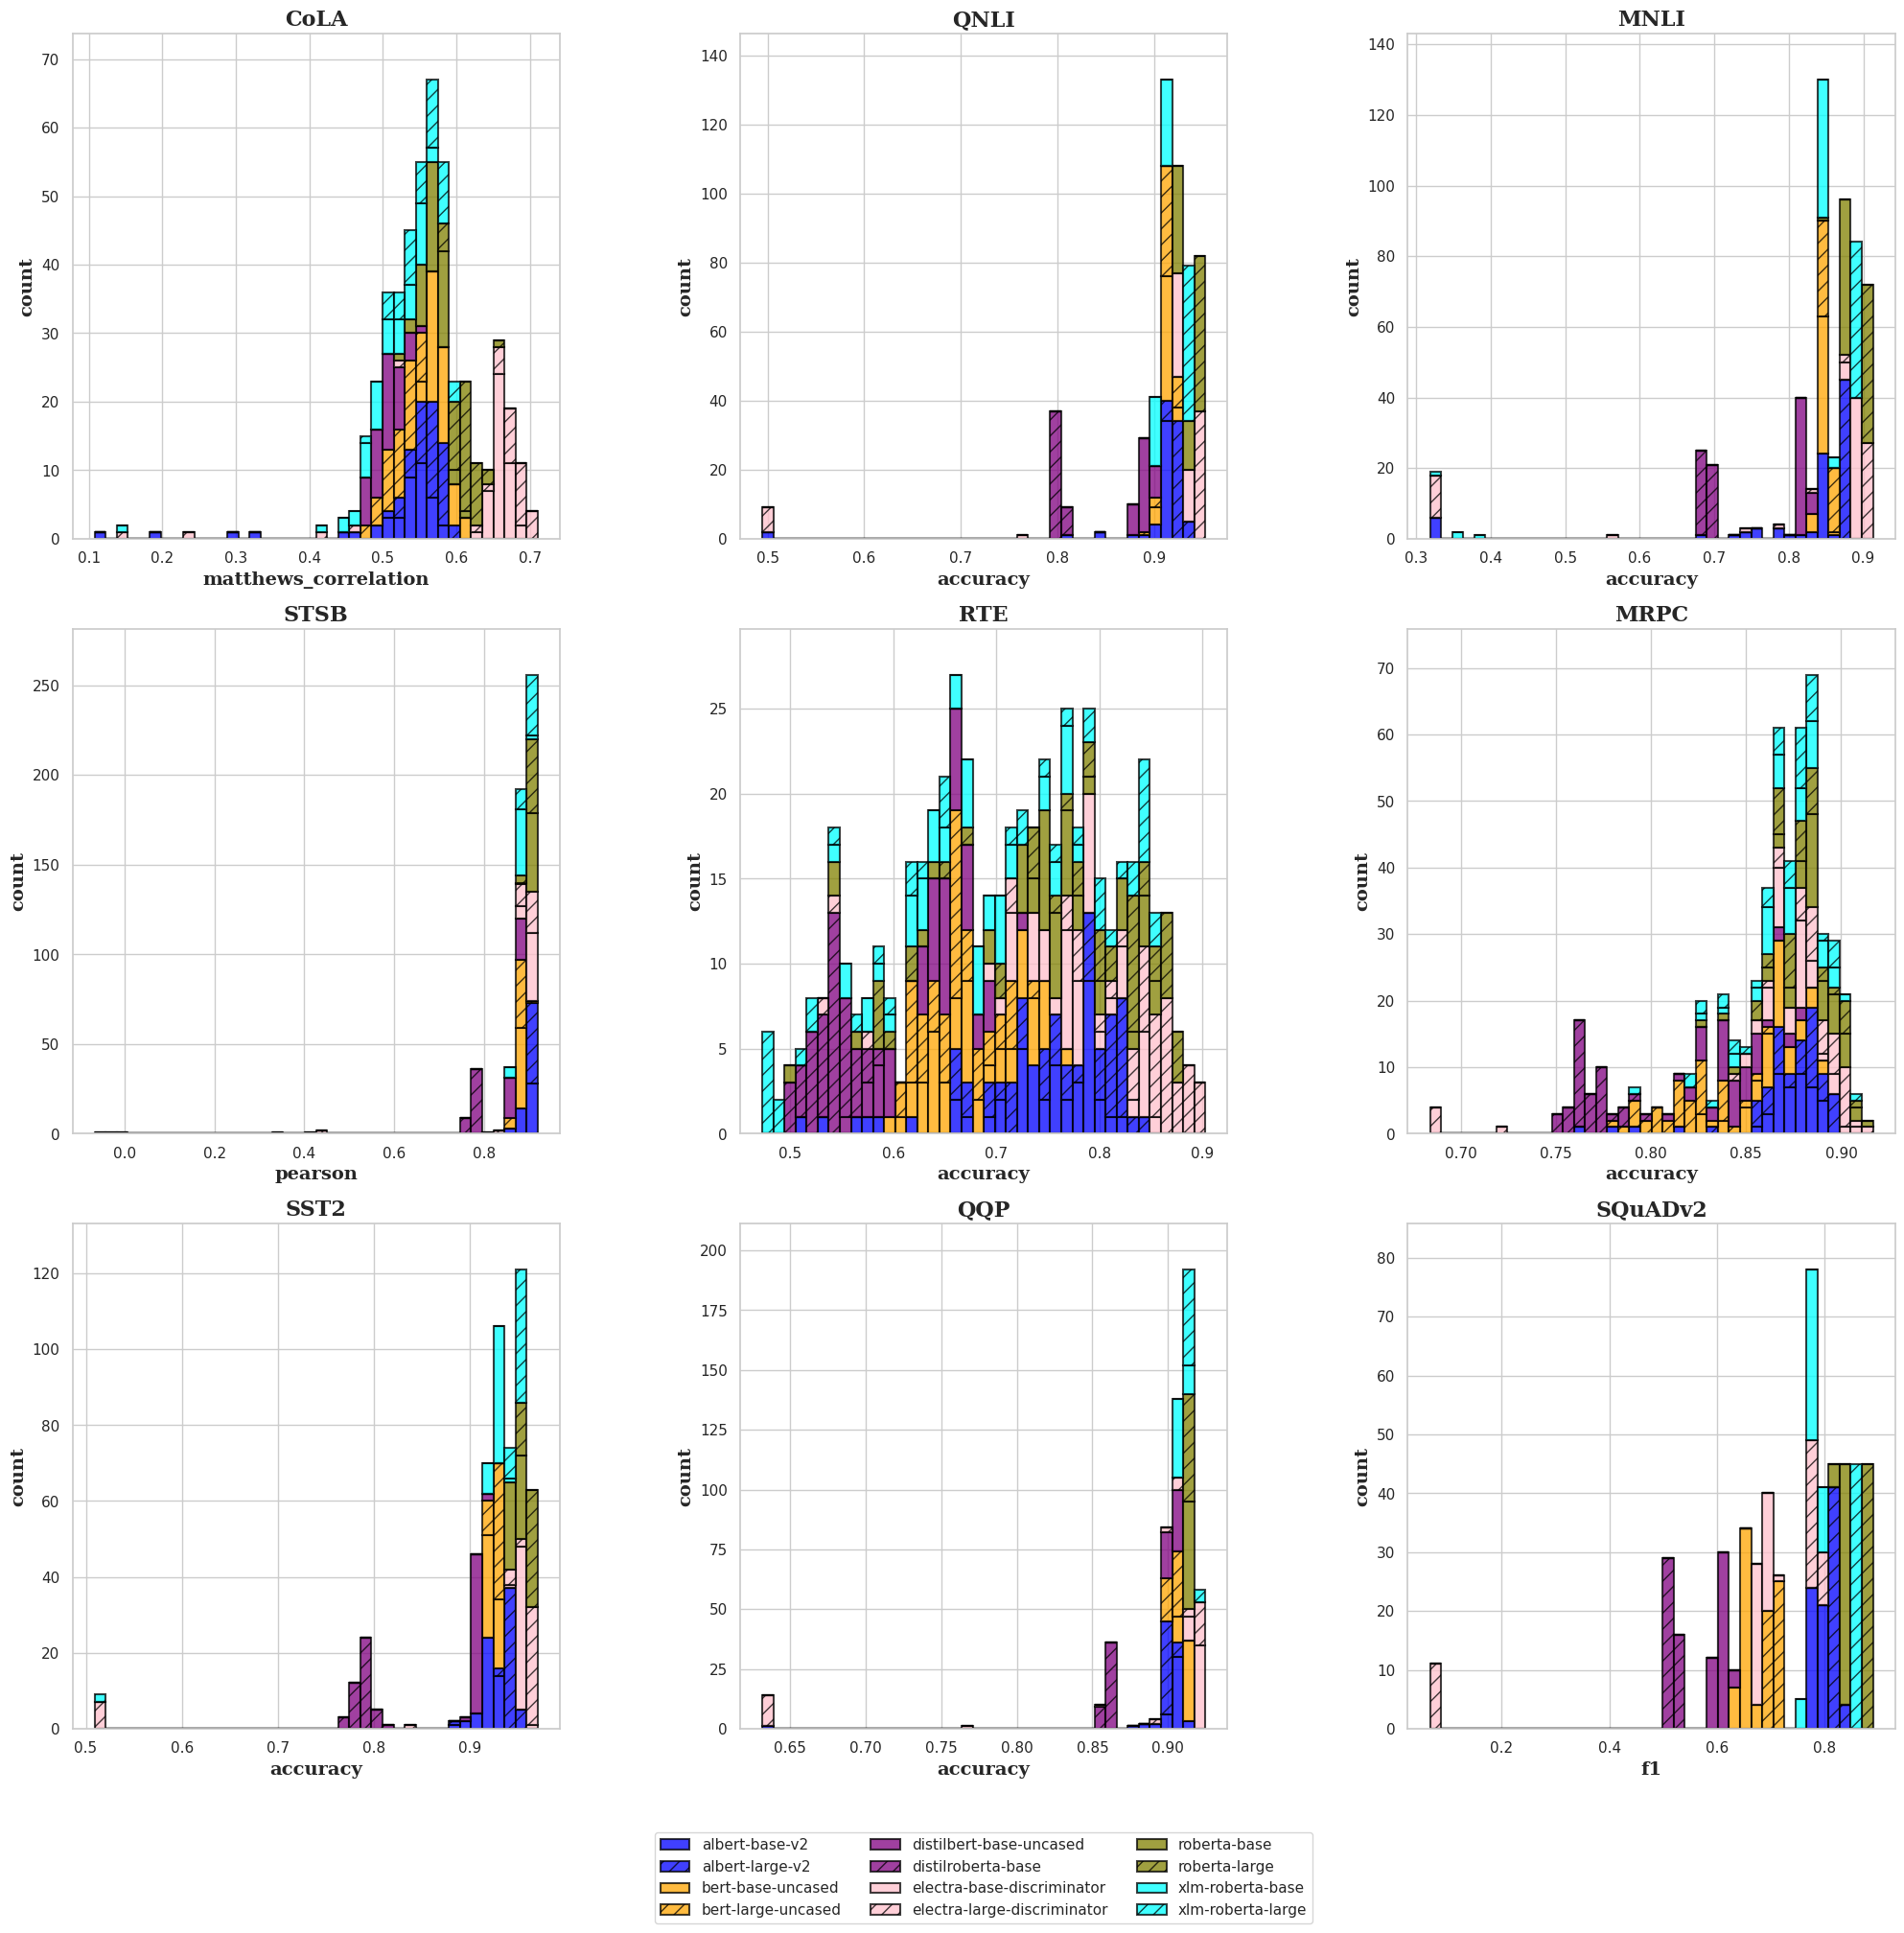

In [221]:
# 각 dataset마다 distribution plot+
import json
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

task_to_metric = {
            "mrpc" : "eval_accuracy",  "cola" : "eval_matthews_correlation", #"cola" : "eval_accuracy",
            "rte" :'eval_accuracy', "sst2" :'eval_accuracy', "stsb" :'eval_pearson',
             "squad_v2": "f1", "mnli": "eval_accuracy", 
            "qnli": "eval_accuracy", "qqp": "eval_accuracy"
}
label_task_to_metric = {
            "mrpc" : "accuracy",  "cola" : "matthews_correlation", #"cola" : "eval_accuracy",
            "rte" :'accuracy', "sst2" :'accuracy', "stsb" :'pearson',
             "squad_v2": "f1", "mnli": "accuracy", 
            "qnli": "accuracy", "qqp": "accuracy"
}
# Define font properties for labels and titles
label_font = {'size': 14, 'family': 'serif', 'weight': 'bold'}
title_font = {'size': 16, 'family': 'serif', 'weight': 'bold'}

tasks =['cola', 'qnli', 'mnli', 'stsb','rte','mrpc', 'sst2','qqp','squad_v2']
def load_accuracy_for_base_model(task, base_model):
    with open(f'../ptm_model_bench/performance/merged_models/{task}_performance_score.json') as f:
        perf = json.load(f)
    perf_list= [i[task_to_metric[task]]  for k, i in perf[task].items() if k.split('_')[0] == base_model]
    if task == 'squad_v2':
        perf_list = [x/100 for x in perf_list]
    if task == 'cola':
        perf_list = [x for x in perf_list if x>0.1]
    return perf_list



# Set the style for the plots
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for tdx, (task, ax) in enumerate(zip(tasks, axes.flat)): 
    dist ={}
    dist['group']=[]
    dist[label_task_to_metric[task]]=[]
    for idx, base_model in enumerate(base_model_list):
        y=load_accuracy_for_base_model(task, base_model)
        dist[label_task_to_metric[task]]+= y
        dist['group']+= [base_model]*len(y)
#         if idx == len(base_model_list) -1:
#             sns.histplot(y, kde = False, ax=ax, binwidth=0.01, 
#                              color=colors[base_model],
#                         label=base_model).set(
#             title="{}".format(task_title[task]))
#         else:
#             sns.histplot(y, kde = False, ax=ax, binwidth=0.01, 
#                              color=colors[base_model],
#                         label=base_model)
    data = pd.DataFrame(dist)
#     sns.histplot(data=dist,x=label_task_to_metric[task],  kde = False, ax=ax, binwidth=0.025, 
#                  hue = "group", multiple='stack', palette=base_model_to_color_hash ).set(
#             title="{}".format(task_title[task]), )
    groups = data['group'].unique()
    bins = np.linspace(data[label_task_to_metric[task]].min(), data[label_task_to_metric[task]].max(), int(1/0.025)+1)
#     bins = np.linspace(0, 1, 41)
    bottom = np.zeros(len(bins) - 1)
    for group in groups:
        group_data = data[data['group'] == group][label_task_to_metric[task]]
        heights, _ = np.histogram(group_data, bins=bins)
        # Plot the histogram bars for the current group
#         print(np.diff(bins), len(bins))
#         assert False
        bar_container = ax.bar(bins[:-1], heights, width=np.diff(bins), bottom=bottom, align='edge',
                               color=base_model_to_color[group], edgecolor='black', linewidth=1.5, 
                               hatch=base_model_to_hatch[group], label=group, alpha=0.75)
        # Update the bottom of the bars for the next group
        bottom += heights
    ax.set_ylim(0, max(bottom) * 1.1)
    ax.set_xlabel(label_task_to_metric[task],fontdict=label_font)
    ax.set_ylabel('count',fontdict=label_font)
    ax.set_title(f'{task_title[task]}',fontdict=title_font)
    if tdx == len(tasks)-2:
        handles, labels = ax.get_legend_handles_labels()
#         ax.legend()
        ax.legend(handles, labels,ncol=3, loc='lower center',  bbox_to_anchor=(.5, -0.4))

    else:
        ax.legend().remove()
#     ax.move_lengend(
#     )
# # #         legend = axes.legend(ncol=6, loc='lower center', bbox_to_anchor=(-1.3, -0.4), borderaxespad=0., fontsize=13)       
# #         sns.move_legend(
# #                 ax, "lower center",
# #                 bbox_to_anchor=(.5, -0.4), ncol=3, title=None, frameon=False,
# #             )
# #     else:
# #         ax.legend().remove()
# # sns.move_legend(axe, "lower center")
# # plt.annotate('', xy=(-3.6, -0.16), xycoords='axes fraction', xytext=(-2.6, -0.16), arrowprops=dict(arrowstyle="<-", color='black'))

# plt.show()
# plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)
# fig.savefig('dataset_distribution_for_each_base_model.png', dpi=200)
#     ax.tight_layout()
# Show the legend

# Show the plot
fig.tight_layout(pad= 1)
plt.show()
        


In [219]:
fig.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)
fig.savefig('dataset_distribution_model.png', dpi=200)

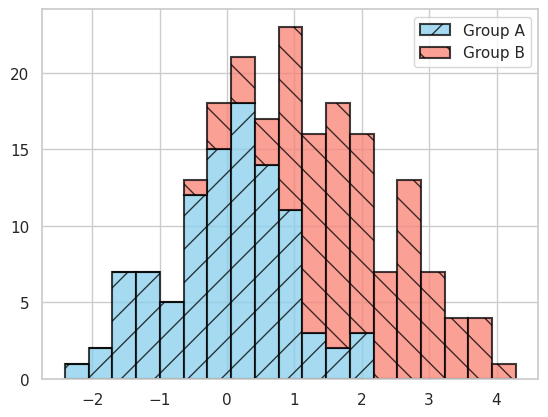

In [181]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data
data = pd.DataFrame({
    "value": np.concatenate([np.random.randn(100), np.random.randn(100) + 2]),
    "group": np.concatenate([np.repeat("Group A", 100), np.repeat("Group B", 100)])
})

# Define colors and hatch patterns for each group
group_colors = {
    "Group A": "skyblue",
    "Group B": "salmon",
}

group_hatch = {
    "Group A": "/",
    "Group B": "\\",
}

# Get the list of unique groups
groups = data['group'].unique()

# Set up bins for the histogram
bins = np.linspace(data['value'].min(), data['value'].max(), 20)

# Create a stacked histogram with hatching for each group
bottom = np.zeros(len(bins) - 1)
for group in groups:
    group_data = data[data['group'] == group]['value']
    
    # Compute histogram values for the current group
    heights, _ = np.histogram(group_data, bins=bins)
    
    # Plot the histogram bars for the current group
    bar_container = plt.bar(bins[:-1], heights, width=np.diff(bins), bottom=bottom, align='edge', color=group_colors[group], edgecolor='black', linewidth=1.5, hatch=group_hatch[group], label=group, alpha=0.75)
    
    # Update the bottom of the bars for the next group
    bottom += heights
ax.set_ylim(0, max(bottom) * 1.1)
# Show the legend
plt.legend()

# Show the plot
plt.show()

In [156]:
ax = axes[0][2]

In [180]:
ax.y

<AxesSubplot: >

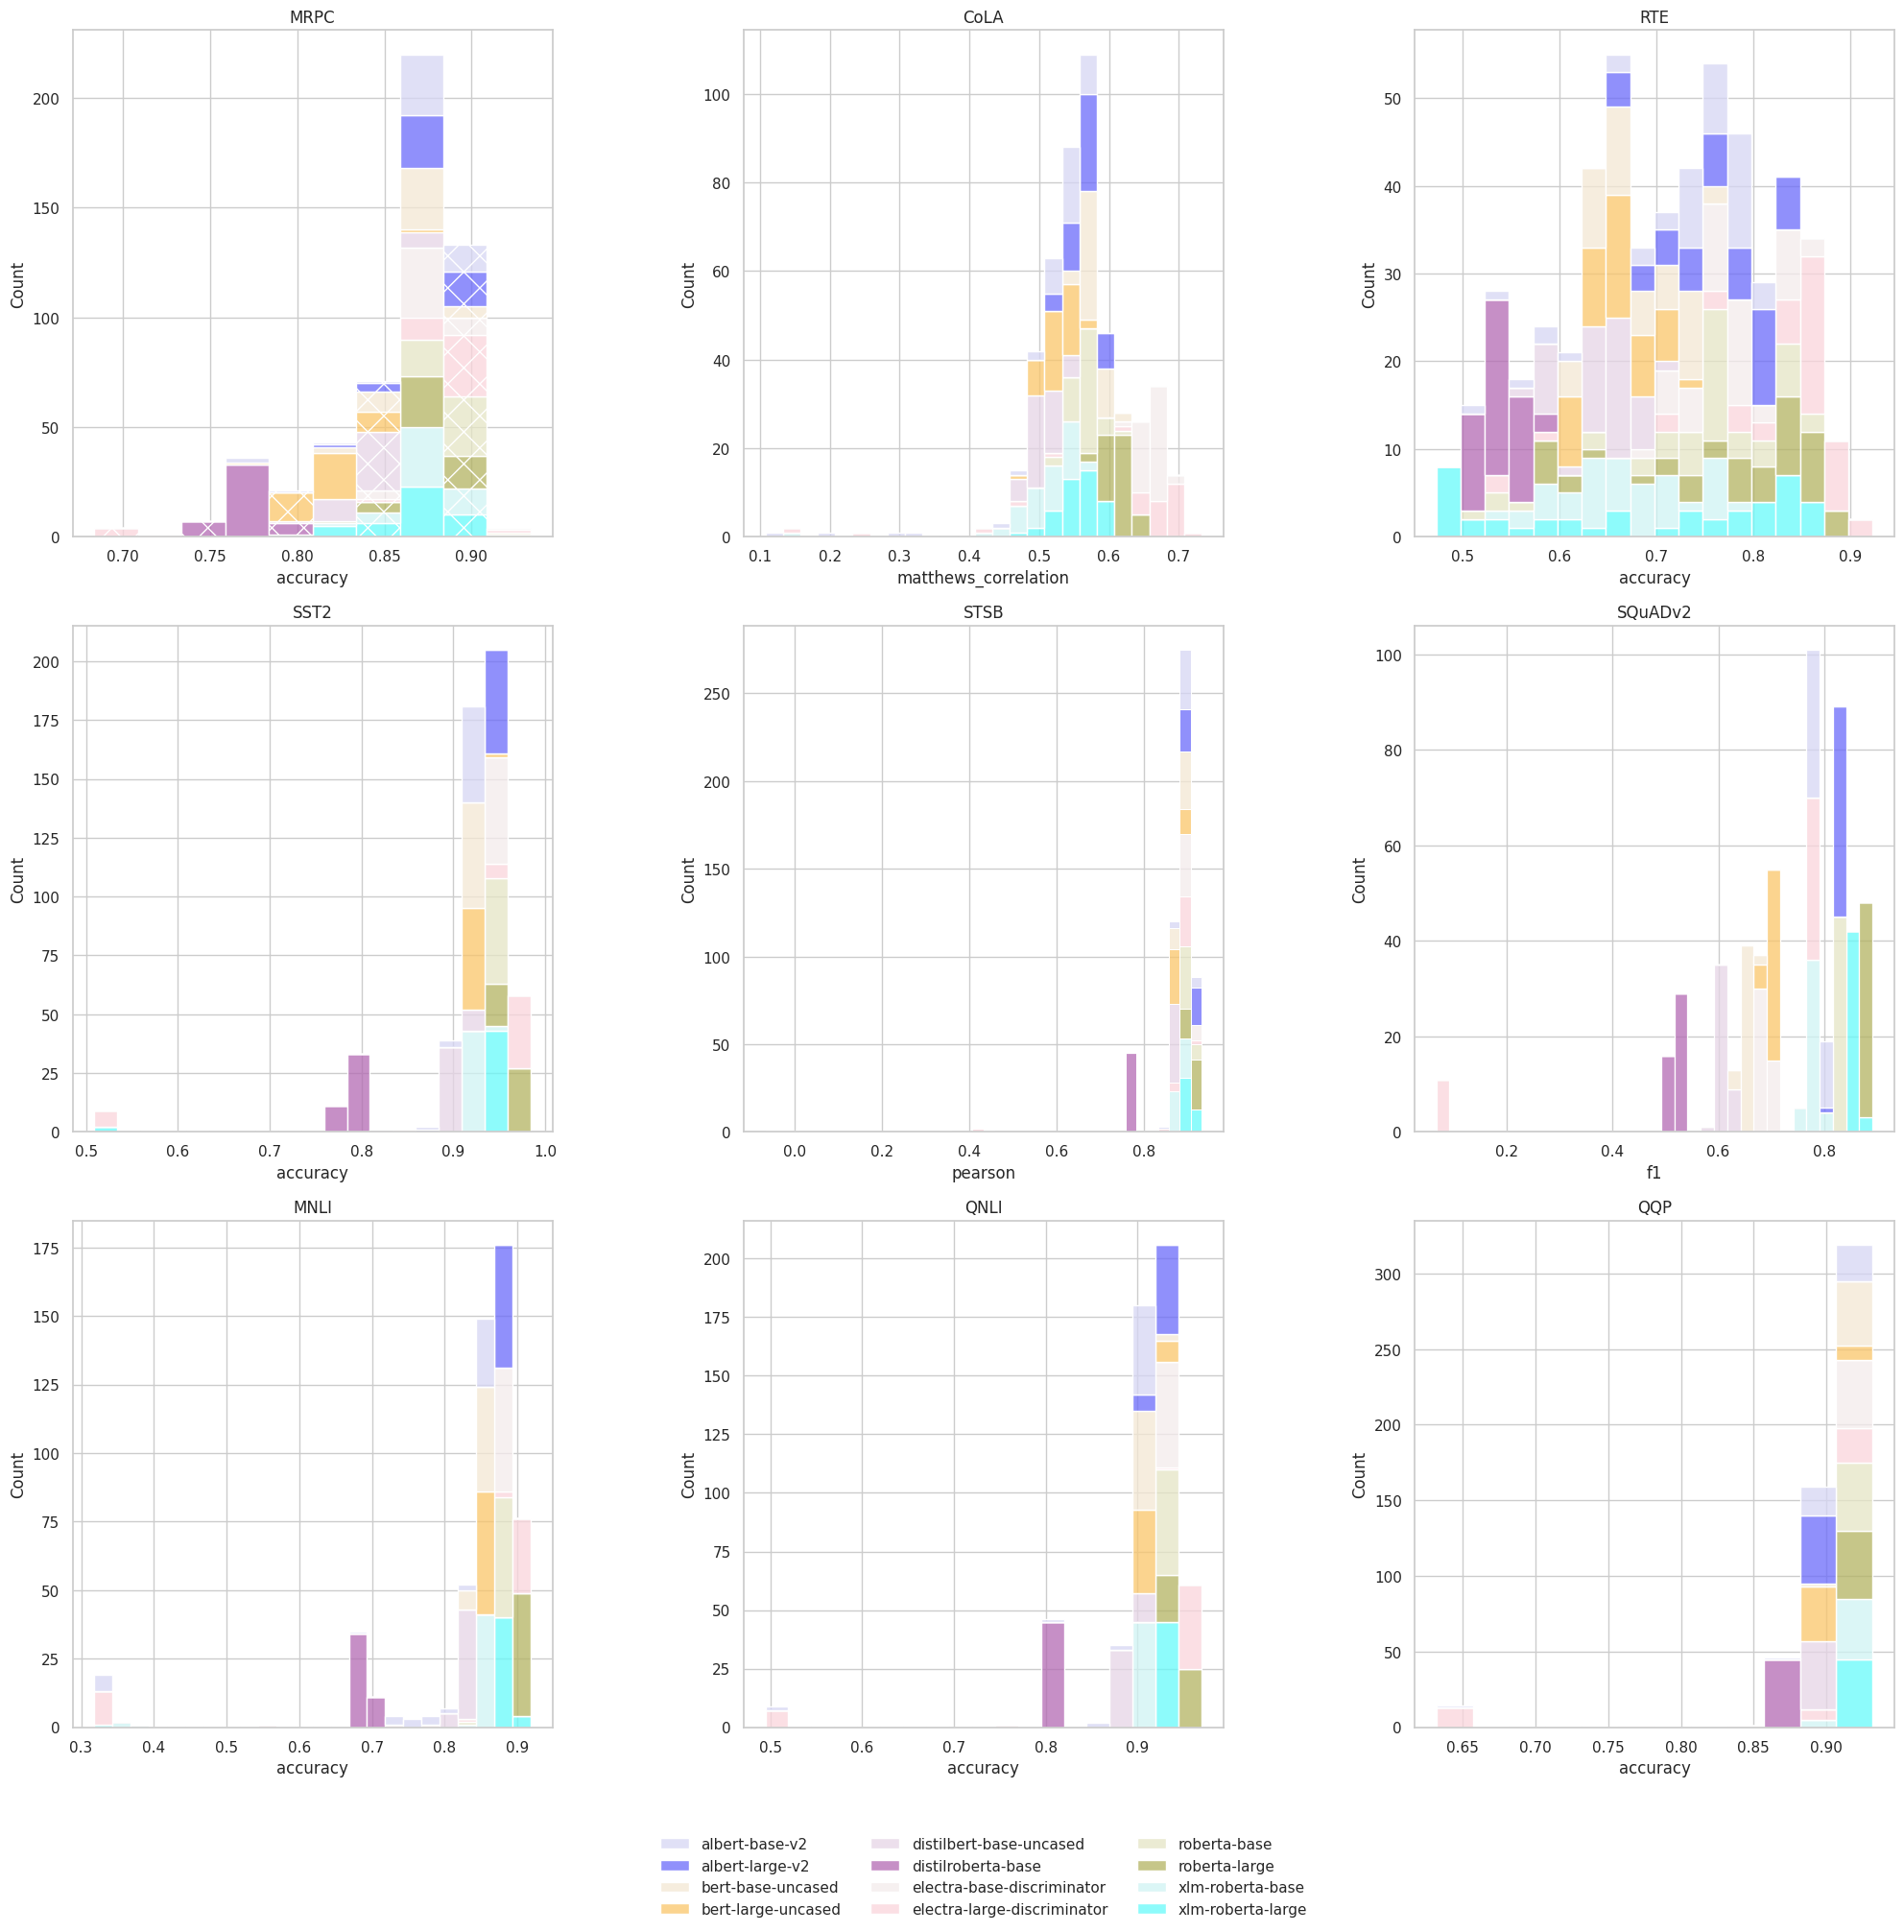

In [148]:
ax.hist()

In [158]:
len(ax.patches)

216